In [44]:
import numpy as np
import argparse
import csv
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
np.random.seed(42)
import math

In [45]:
def readData(filename):
    x = []
    y = []
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return x,y
x,y = readData('gaussian.csv')

In [46]:
sub = 100
xsub = x[:sub]
ysub = y[:sub]

In [47]:
# highest power is m here
def makeDesignMat(x,m):
    return np.vander(x,m+1,increasing=True)

In [310]:
X = makeDesignMat(xsub,6)

In [306]:
LEARNING_RATE = 5e-3
BATCH_SIZE = 100
NUM_ITER = 50000

In [48]:
def chunkarr(arr,n):
    return [arr[i:i + n] for i in range(0, len(arr), n)]

In [49]:
def plot_error(err_list):
    xa = np.linspace(1,len(err_list),len(err_list),dtype=int)
    plt.figure()
    plt.plot(xa,err_list)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.title('Error vs Iterations')
    plt.show()

In [50]:
def descent(X,y,lambd = 0.0, err_function = "mse" ):
    m = len(X[0])
    w = np.random.rand(m)
    Xchunks = chunkarr(X,BATCH_SIZE)
    ychunks = chunkarr(y,BATCH_SIZE)
    err_list = []
    for i in (range(NUM_ITER)):
        for chunk in range(len(Xchunks)):
            Xcon = Xchunks[chunk]
            ycon = ychunks[chunk]
            pred = np.dot(Xcon,w)
            if err_function == "mse":
                err = 0.5 * (np.sum(np.square(pred-ycon)) + lambd*np.sum(np.square(w)))/len(ycon)
                grad = (np.dot(Xcon.T,(pred-ycon)) + lambd*w)/len(ycon)
            if err_function == "mae":
                err = np.sum(np.abs(pred-ycon))
                parity = np.sign(pred - ycon)
                parity = parity.reshape((len(ycon),1))
                grad = np.sum(np.multiply(parity,Xcon).T,axis=1)/len(ycon)
            if err_function == "huber":
                e = 0.1
                temp = pred-ycon
                err = np.sum(np.where(np.abs(temp)<=e,0.5*temp*temp,(e*np.abs(temp) - 0.5*e*e)))
                err += lambd*np.sum(np.square(w))
                err /= len(ycon)
                grad = np.zeros((m,))
                for i in range(len(ycon)):
                    if np.abs(temp[i]<=e):
                        grad += temp[i]*Xcon[i,:]
                    else:
                        grad += e*np.sign(temp[i])*Xcon[i,:]
                grad+=2*lambd*w
                w = np.squeeze(w)
                grad /=len(ycon)
                grad = np.squeeze(grad)
            w = w - LEARNING_RATE * grad
            err_list.append(err)
    #plot_error(err_list)
    return w, np.mean(err_list)
#w = descent(X,ysub,0.05,"mae")

ValueError: operands could not be broadcast together with shapes (100,) (9,) 

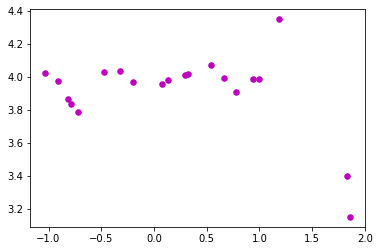

In [31]:
def plot_reg(x,y,theta):
    def aux(X_line,theta):
        temp = 0
        for i in range(len(theta)):
            temp += np.power(X_line,i) * theta[i]
        return temp
    plt.scatter(x,y,color='m',marker ='o',s=30)
    x_line = np.linspace(min(xsub),max(xsub),100)
    y_pred = aux(x_line,theta)
    plt.plot(x_line,y_pred, color='g')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()
plot_reg(xsub,ysub,w)

In [52]:
minerr = 9999999999
bestp,bestlr,bestiter,bestld,bestbs = 0,0,0,0,0
for maxpow in tqdm([3,4,5,6,7,8,9,10]):
    for LEARNING_RATE in tqdm([1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8]):
        for NUM_ITER in tqdm([100,1000,50000]):
            #for lambd in [1e-12,1e-9,1e-5,1e-3,1e-2,1e-1]:
            for BATCH_SIZE in [4,8,16]:
                X = makeDesignMat(xsub,maxpow)
                w,err = descent(X,ysub,0,"mse")
                if err<minerr:
                    bestp = maxpow
                    bestlr = LEARNING_RATE
                    bestiter = NUM_ITER
                    #bestld = lambd
                    bestbs = BATCH_SIZE
                    minerr = err
                    print(bestp,bestlr,bestiter,bestld,bestbs)

3 0.1 100 0 4
3 0.1 100 0 8
3 0.1 100 0 16
3 0.1 1000 0 8
3 0.1 1000 0 16
3 0.1 50000 0 16



3 0.01 50000 0 4
3 0.01 50000 0 8
3 0.01 50000 0 16



c:\users\kshitij alwadhi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in square
  del sys.path[0]
c:\users\kshitij alwadhi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
c:\users\kshitij alwadhi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


4 0.01 50000 0 4
4 0.01 50000 0 8
4 0.01 50000 0 16



5 0.01 50000 0 16



c:\users\kshitij alwadhi\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


In [53]:
bestp

5

In [54]:
bestlr

0.01

In [55]:
bestiter

50000

In [ ]:
bestld

In [56]:
bestbs

16

In [42]:
LEARNING_RATE = 1e-2
BATCH_SIZE = 10
NUM_ITER = 50000
X = makeDesignMat(xsub,5)
w = descent(X,ysub,0.001,"mse")

ValueError: operands could not be broadcast together with shapes (100,) (6,) 

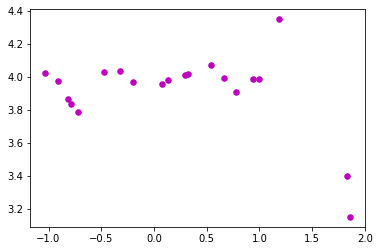

In [43]:
plot_reg(xsub,ysub,w)